In [45]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

**<h1>1.1<h1>**

In [46]:
def L(theta):
  return 391 * np.log(theta[0]) + 584 * np.log(theta[1]) + 1025 * np.log(theta[2]) 

In [48]:
theta = [[0.2, 0.3, 0.5], [0.2, 0.5, 0.3], [0.3, 0.2, 0.5], [0.3, 0.5, 0.2], [0.5, 0.2, 0.3], [0.5, 0.3, 0.2]]
max_L = -np.inf
max_t = []
for t in theta:
  if(L(t) > max_L):
    max_L = L(t)
    max_t = t
print("Max L is", max_L, "with theta:", max_t)

Max L is -2042.8862015620239 with theta: [0.2, 0.3, 0.5]


**<h1>1.2<h1>**

In [49]:
import math

import scipy.special as sc
from scipy.optimize import minimize

In [50]:
theta_u = 10
n_size_u = 1000
X = np.random.uniform(-theta_u, theta_u, n_size_u)

In [51]:
def L_uniform_minuse(param):
    L = 0
    if((X.max() <= param)):
        if len(X) % 2 == 1:
            L = abs(1/(2 * param))
        else:
            L = 1/(2 * param)
    else:
        L = -1e20    
    return -L

In [57]:
def Ln_L_uniform_minuse(param, x_vec):
    Ln_L = 0
    if((max(x_vec.max(), x_vec.min()) <= param)):
        return len(x_vec) * math.log(2 * param)
    else:
        return 1e+25   

In [53]:
res = minimize(L_uniform_minuse, x0=12, method='Nelder-Mead')
print(res.x)

[9.99506836]


In [58]:
ans_omp = []
for i  in range(100):
    X = np.random.uniform(-theta_u, theta_u, n_size_u)
    res = minimize(Ln_L_uniform_minuse, x0=12, args=X, method='Nelder-Mead')
    ans_omp.append(res.x)

In [59]:
print(ans_omp)

[array([9.97525406]), array([9.9907093]), array([9.99539337]), array([9.92921562]), array([9.99146461]), array([9.99943199]), array([9.97884293]), array([9.92165565]), array([9.97066383]), array([9.98006973]), array([9.98707237]), array([9.97745819]), array([9.99155617]), array([9.98415756]), array([9.98443909]), array([9.99681358]), array([9.98818245]), array([9.99217644]), array([9.9878231]), array([9.99219131]), array([9.95365791]), array([9.99520111]), array([9.99431534]), array([9.96941071]), array([9.99196472]), array([9.99349937]), array([9.99093018]), array([9.92605476]), array([9.95296555]), array([9.99131241]), array([9.98655052]), array([9.99929924]), array([9.98918953]), array([9.96004715]), array([9.95193558]), array([9.99450874]), array([9.98854294]), array([9.99904518]), array([9.93954506]), array([9.95304451]), array([9.98387146]), array([9.98179092]), array([9.99570694]), array([9.99947777]), array([9.98671761]), array([9.99369965]), array([9.99309082]), array([9.99759

Text(0.5, 0, 'theta value')

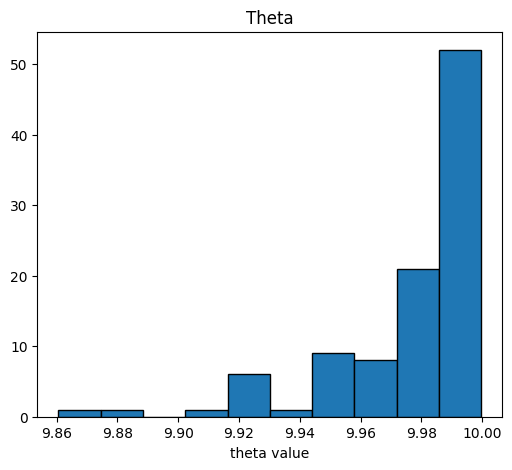

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.hist(np.array(ans_omp), edgecolor="black")
ax.set_title("Theta")
ax.set_xlabel("theta value")

In [62]:
def F_uniform(param, x):
    if (x <= param) & (x >= -param):
        return (x + param) / (2 * param)
    elif x < -param:
        return 0
    elif x > param:
        return 1

In [63]:
def S_uniform(param, x_vec):
    x_vec_sorted = np.sort(x_vec)
    S = 1e3*F_uniform(param, x_vec_sorted[0])
    for i in range(1, len(x_vec_sorted)):
        #print(F_uniform(param, x_vec_sorted[i]) - F_uniform(param, x_vec_sorted[i - 1]))
        S = S * 1e3*(F_uniform(param, x_vec_sorted[i]) - F_uniform(param, x_vec_sorted[i - 1]))
    S = S * 1e3*(1 - F_uniform(param, x_vec_sorted[len(x_vec_sorted) - 1]))
    #print(S)
    return -S

In [64]:
X = np.random.uniform(-theta_u, theta_u, 1000)
res = minimize(S_uniform, x0=12, args=X, method='Nelder-Mead')
print(res)

 final_simplex: (array([[9.98994141],
       [9.99001465]]), array([-2.65279275e-264, -2.65274576e-264]))
           fun: -2.6527927462722688e-264
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 20
        status: 0
       success: True
             x: array([9.98994141])


In [65]:
ans_oms = []
for i  in range(100):
    X = np.random.uniform(-theta_u, theta_u, n_size_u)
    res = minimize(S_uniform, x0=12, args=X, method='Nelder-Mead')
    ans_oms.append(res.x)

In [66]:
print(np.array(ans_oms).shape)

(100, 1)


In [67]:
ans_oms_2 = np.array([ao for ao in ans_oms if ao < 11])
ans_oms_3 = np.array([ao for ao in ans_oms if ao > 11.75])

Text(0.5, 0, 'theta value')

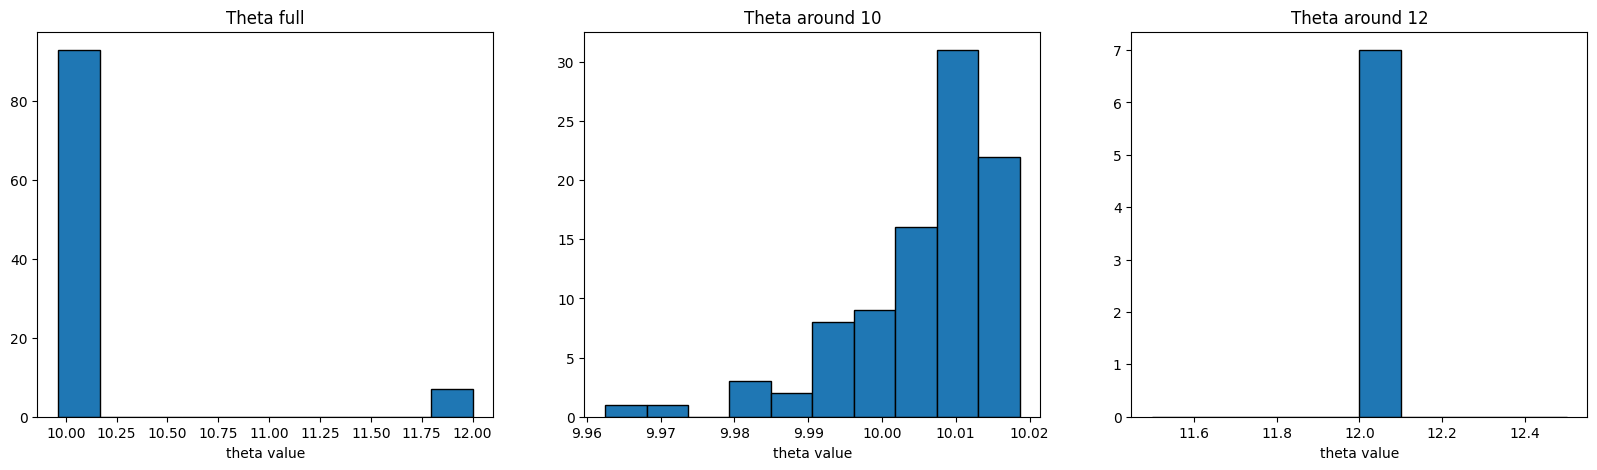

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].hist(np.array(ans_oms), edgecolor="black")
ax[0].set_title("Theta full")
ax[0].set_xlabel("theta value")

ax[1].hist(ans_oms_2, edgecolor="black")
ax[1].set_title("Theta around 10")
ax[1].set_xlabel("theta value")

ax[2].hist(ans_oms_3, edgecolor="black")
ax[2].set_title("Theta around 12")
ax[2].set_xlabel("theta value")


**<h1>1.3<h1>**

In [19]:
a = 3
b = 8
n_size = 1000

In [22]:
def f_Beta(param_a, param_b, x):
    if((x >= 0) & (x <= 1)):
        return (x**(param_a-1) * (1-x)**(param_b-1)) / sc.beta(param_a, param_b)
    else:
        return 0

In [23]:
def Ln_L_Beta_minuse(param_ab, x_vec):
    L = 0
    for x in x_vec:
        L = L + (param_ab[0] - 1) * math.log(x) + (param_ab[1] - 1) * math.log(1 - x)
    L = L - len(x_vec) * math.log(sc.beta(param_ab[0], param_ab[1]))    
    return -L    

In [34]:
X = np.random.beta(a, b, 10000)
res = minimize(Ln_L_Beta_minuse, x0=(1, 2), args=X, method='Nelder-Mead')
print(res.x)

[3.00704083 8.02950371]


In [35]:
ans = []
for i  in range(1000):
    X = np.random.beta(a, b, 10000)
    res = minimize(Ln_L_Beta_minuse, x0=(1, 2), args=X, method='Nelder-Mead')
    ans.append(res.x)

In [36]:
ans = np.array(ans).T
print(ans.shape)

(2, 1000)


Text(0, 0.5, 'b')

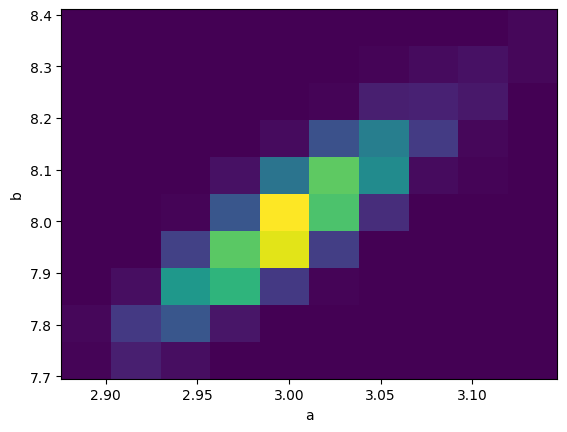

In [37]:
plt.hist2d(ans[0], ans[1])
plt.xlabel('a')
plt.ylabel('b')

Text(0.5, 0, 'b value')

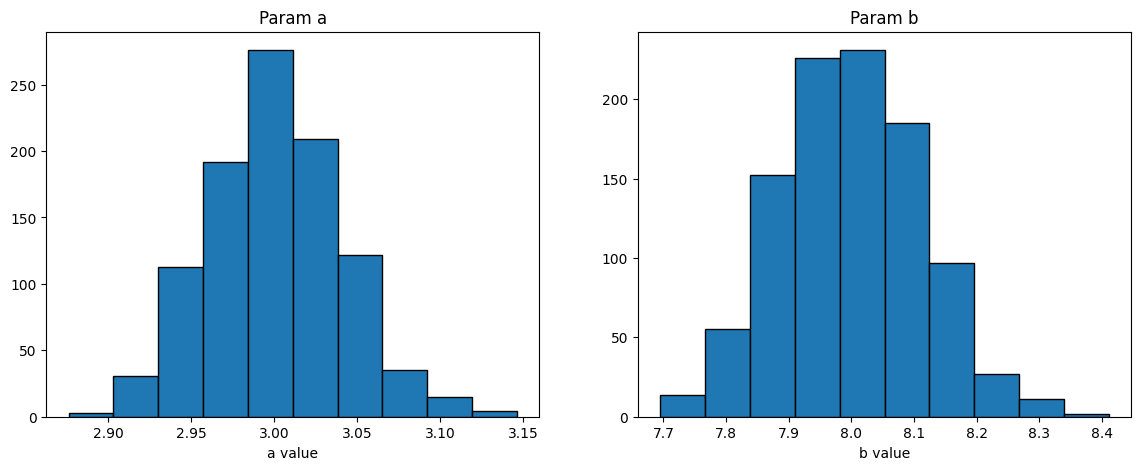

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(ans[0], edgecolor="black")
ax[0].set_title("Param a")
ax[0].set_xlabel("a value")

ax[1].hist(ans[1], edgecolor="black")
ax[1].set_title("Param b")
ax[1].set_xlabel("b value")

Text(0.5, 0, 'b value')

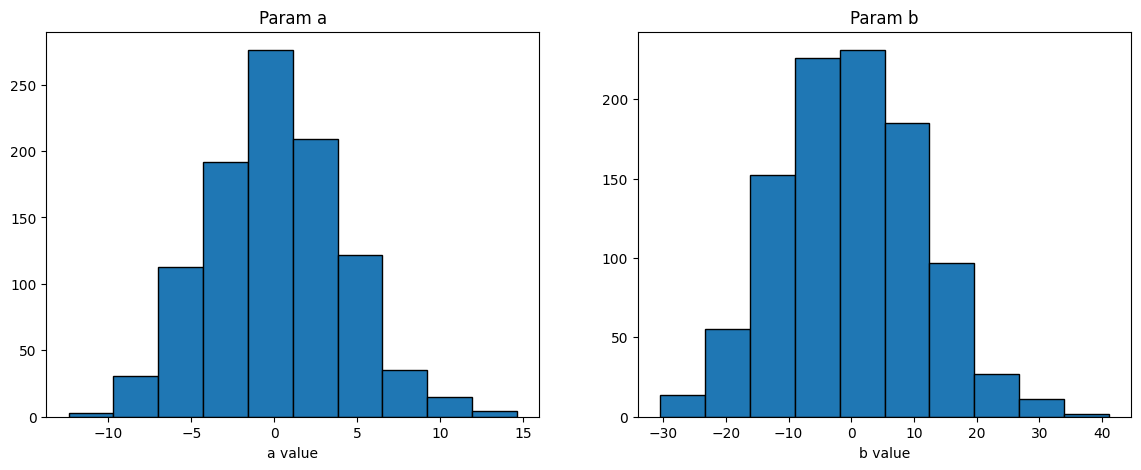

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(np.sqrt(10000)*(ans[0] - a), edgecolor="black")
ax[0].set_title("Param a")
ax[0].set_xlabel("a value")

ax[1].hist(np.sqrt(10000)*(ans[1] - b), edgecolor="black")
ax[1].set_title("Param b")
ax[1].set_xlabel("b value")

In [41]:
from scipy import stats

In [44]:
shapiro_test_a = stats.shapiro(np.sqrt(10000)*(ans[0] - a))
shapiro_test_b = stats.shapiro(np.sqrt(10000)*(ans[1] - b))
print(shapiro_test_a, shapiro_test_b, sep='\n')

ShapiroResult(statistic=0.9963621497154236, pvalue=0.019864145666360855)
ShapiroResult(statistic=0.997767984867096, pvalue=0.19854560494422913)
